In [2]:
# Importer des libairies utilisables

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno
import seaborn as sns
import scipy.stats as stats
import pingouin as pg
import matplotlib.image as mpimg


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import math

from sklearn.neighbors import NearestNeighbors
from sklearn import decomposition

from unidip import UniDip
import unidip.dip as dip

from scipy.stats import norm
from sklearn.neighbors import KernelDensity
import utils
from statsmodels.nonparametric.bandwidths import bw_silverman, bw_scott

In [3]:
# Importer des données et les transformer en DataFrame pandas à partir de fichier nettoyé

df = pd.read_csv('openfoodfacts_clean_median.csv')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


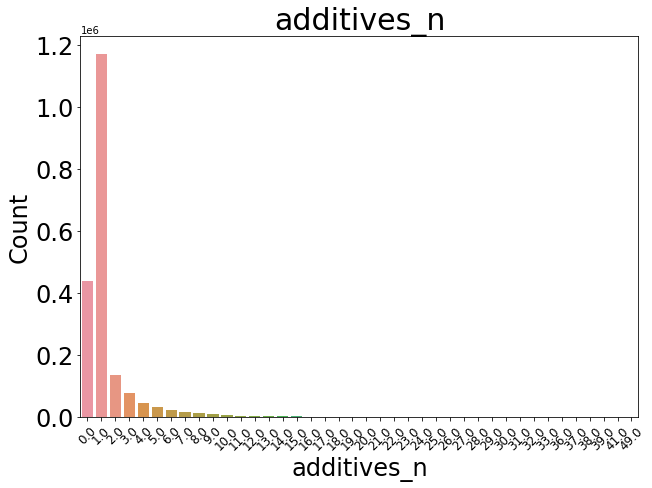

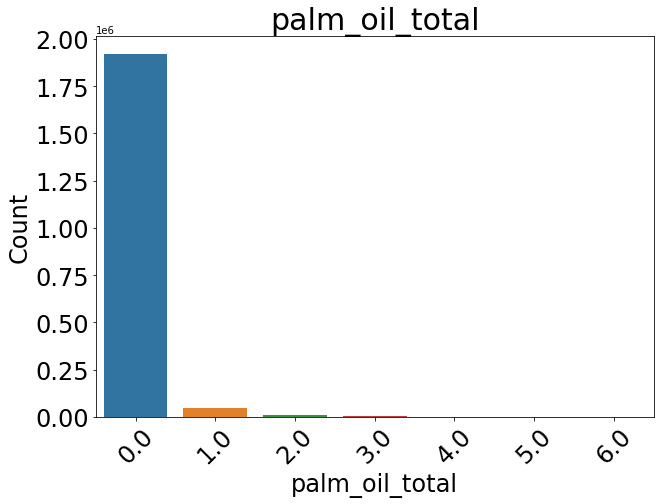

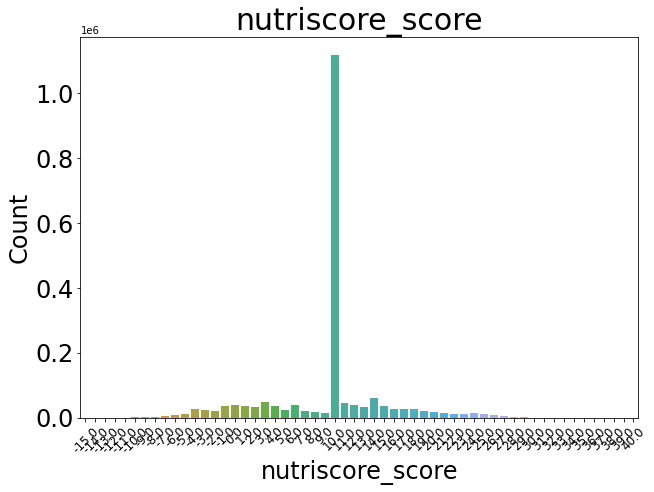

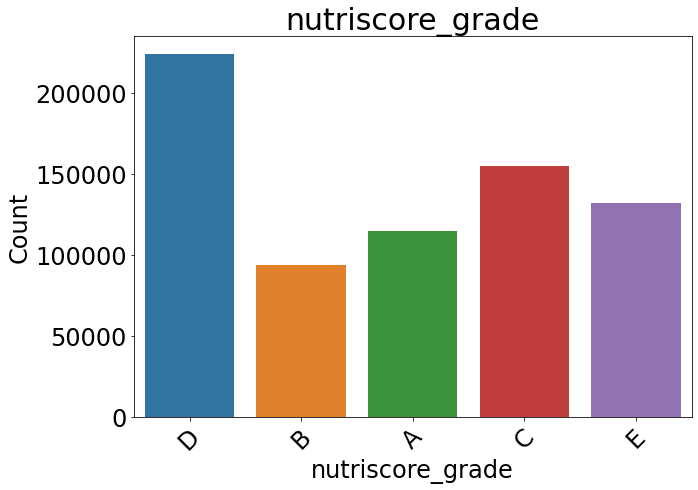

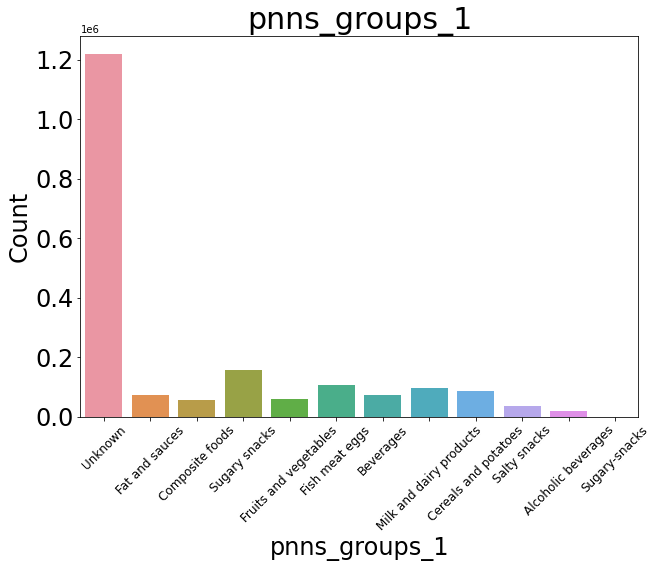

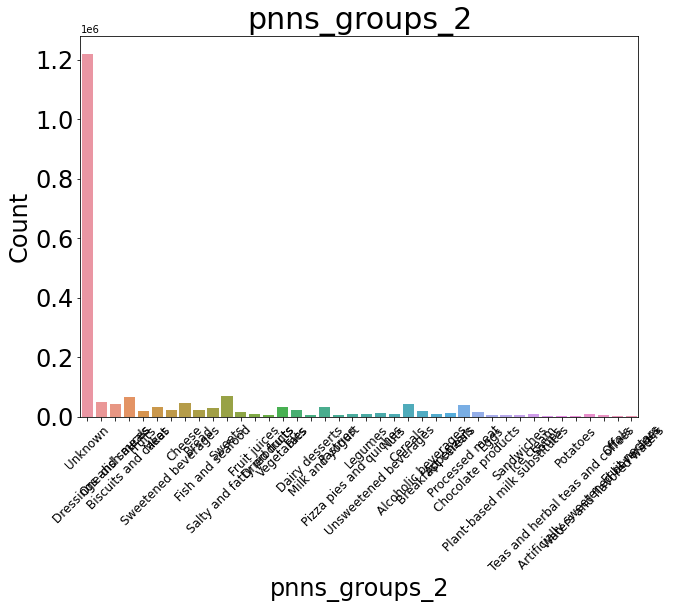

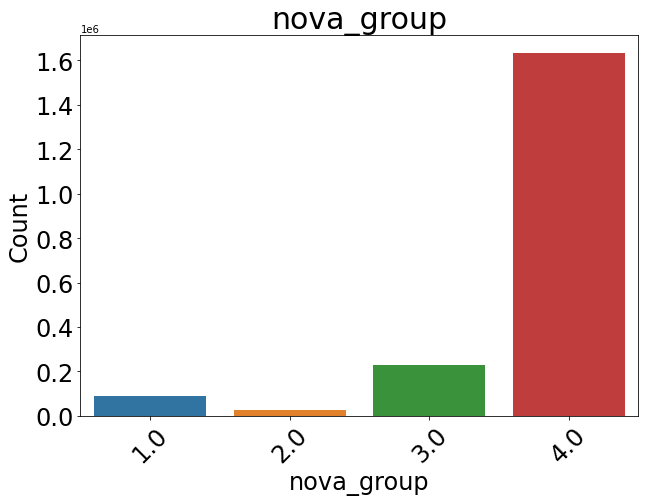

In [137]:
# Distribution des variables catégorielles

col_cat = ["additives_n", "palm_oil_total", "nutriscore_score", "nutriscore_grade", "pnns_groups_1", 
           "pnns_groups_2", "nova_group"]

for col in col_cat:
    if df[col].value_counts().shape[0] > 10:
        plt.figure(figsize=(10, 7))
        sns.countplot(x=col, data=df)
        plt.title(col, fontsize = 30)
        plt.xticks(rotation = 45, fontsize = 12)
        plt.xlabel(col, fontsize = 24)
        plt.ylabel('Count', fontsize = 24)
        plt.yticks(fontsize = 24)
        plt.show()
    else:
        plt.figure(figsize=(10, 7))
        sns.countplot(x=col, data=df)
        plt.title(col, fontsize = 30)
        plt.xticks(rotation = 45, fontsize = 24)
        plt.xlabel(col, fontsize = 24)
        plt.ylabel('Count', fontsize = 24)
        plt.yticks(fontsize = 24)
        plt.show()

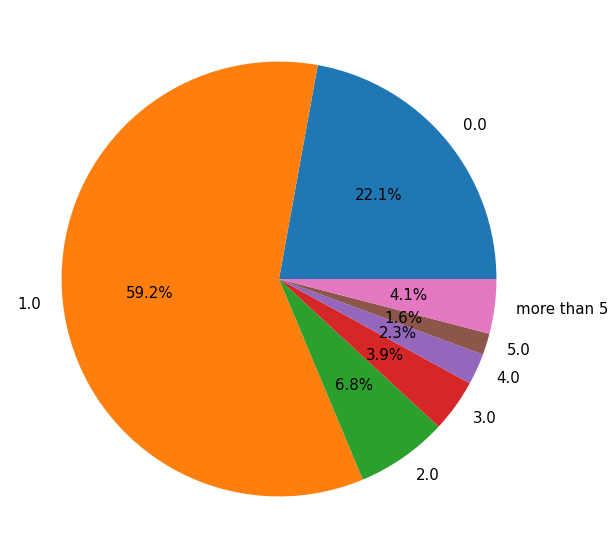

In [141]:
# Pourcentage de produit en fonction de nombre d'additifs

additives = pd.DataFrame(df.additives_n.value_counts())
label = []
for i in range(40):
    if i < 6:
        label.append(additives.index[i])
    else:
        label.append('more than 5')
additives['label'] = label
additives = additives.groupby('label').sum()
plt.figure(figsize=(10, 10))
plt.pie(additives.additives_n, labels = additives.index, autopct='%1.1f%%', textprops={'size': 15})
plt.show()


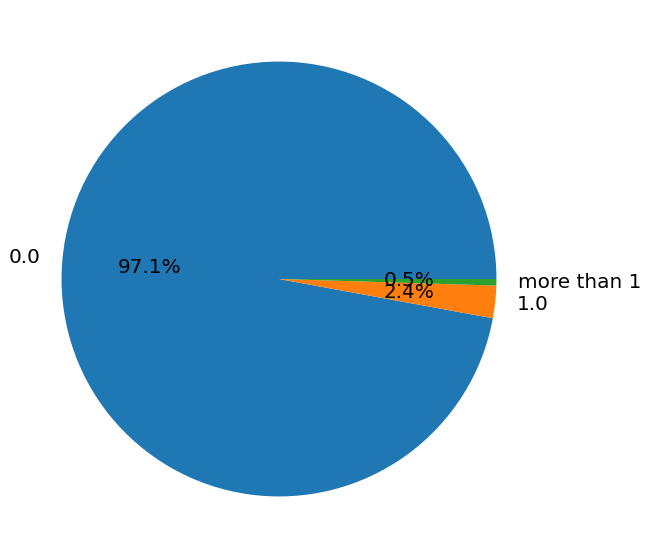

In [142]:
# Pourcentage de produit en fonction de nombre d'ingrédient dérivé de l'huile de palme

palm = pd.DataFrame(df.palm_oil_total.value_counts())
label = []
for i in range(7):
    if i < 2:
        label.append(palm.index[i])
    else:
        label.append('more than 1')
palm['label'] = label
palm = palm.groupby('label').sum()
plt.figure(figsize=(10, 10))
plt.pie(palm.palm_oil_total, labels = palm.index, autopct='%1.1f%%', textprops={'size': 20})
plt.show()

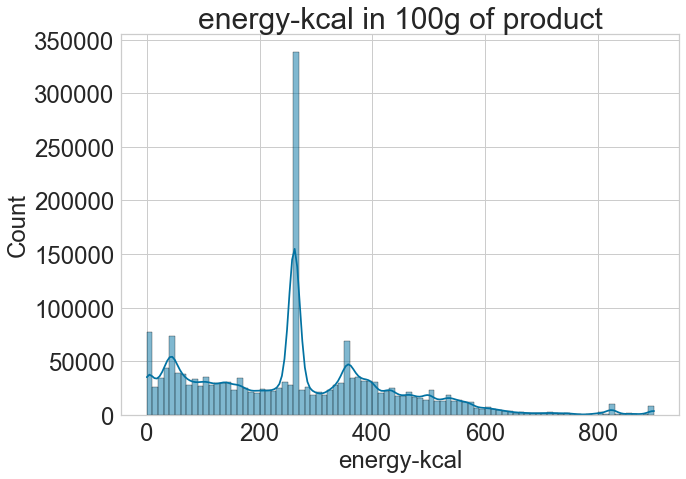

0    261.904762
dtype: float64
(0.0799279947588366, 0.000999000999000999, (14040, 14043))


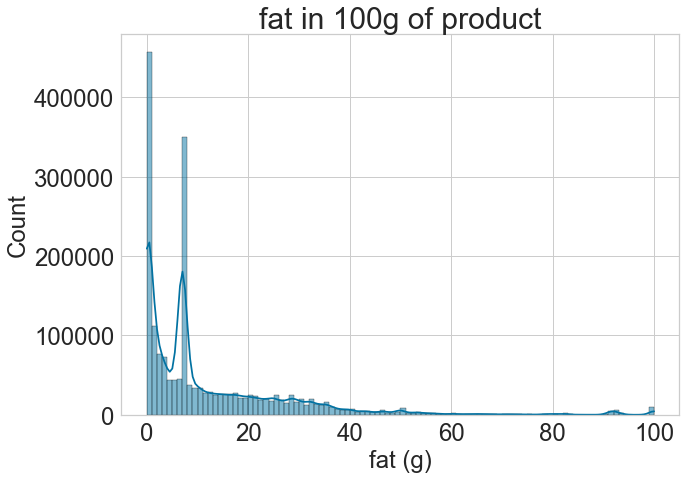

0    7.02
dtype: float64
(0.08032479775522611, 0.000999000999000999, (0, 982))


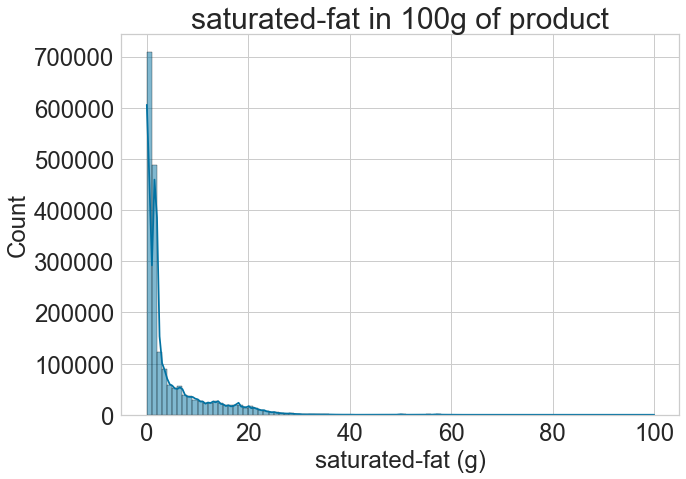

0    0.0
dtype: float64


/opt/anaconda3/lib/python3.8/site-packages/unidip/dip.py:27: RuntimeWarning: divide by zero encountered in true_divide
  slopes = (work_cdf[1:] - work_cdf[0]) / distances


(0.09494722889687485, 0.000999000999000999, (0, 7))


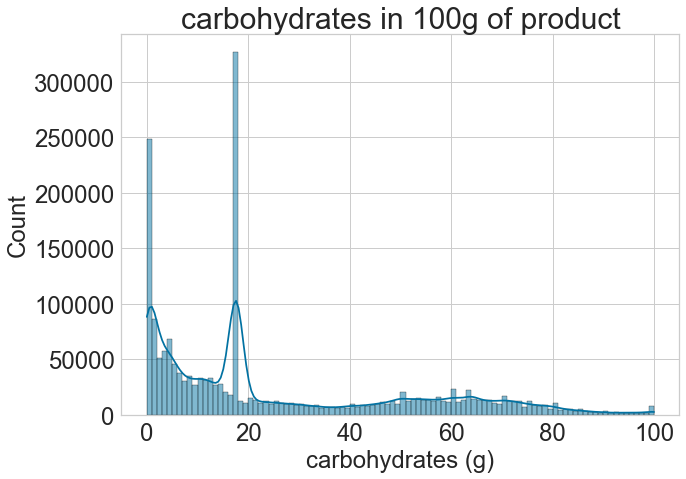

0    17.57
dtype: float64
(0.07877566787873633, 0.000999000999000999, (8458, 8458))


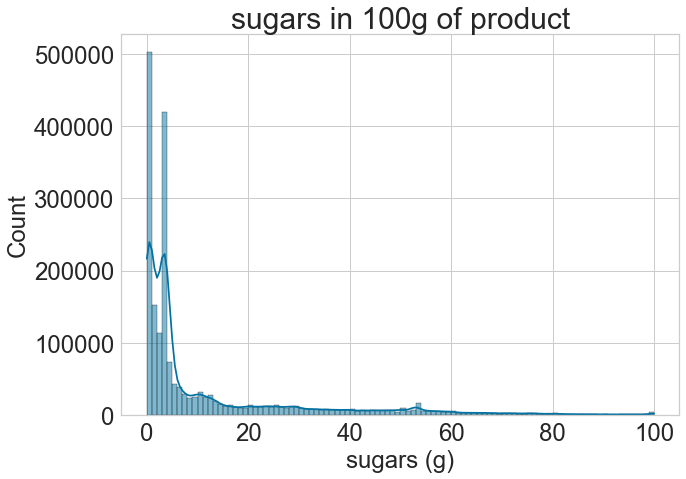

0    3.57
dtype: float64
(0.08272704535489747, 0.000999000999000999, (3786, 3786))


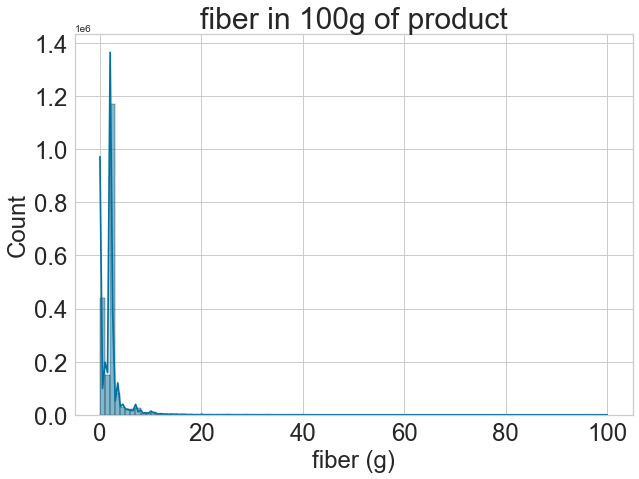

0    2.2
dtype: float64
(0.2745514987843863, 0.000999000999000999, (1163, 1163))


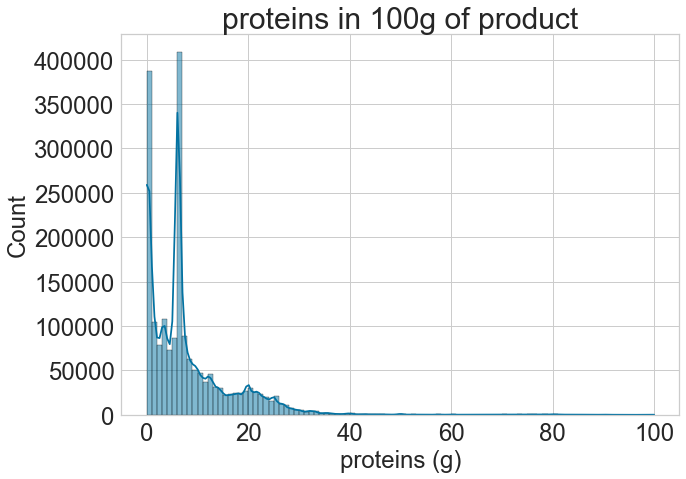

0    6.1
dtype: float64
(0.07993888009623654, 0.000999000999000999, (5142, 5145))


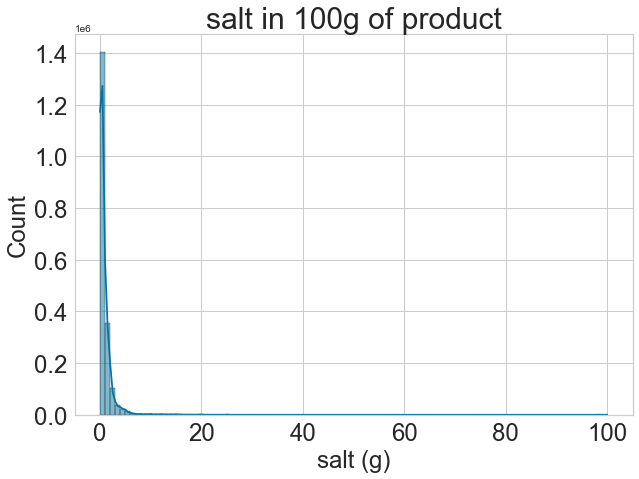

0    0.575
dtype: float64
(0.09780323765374904, 0.000999000999000999, (7475, 7475))


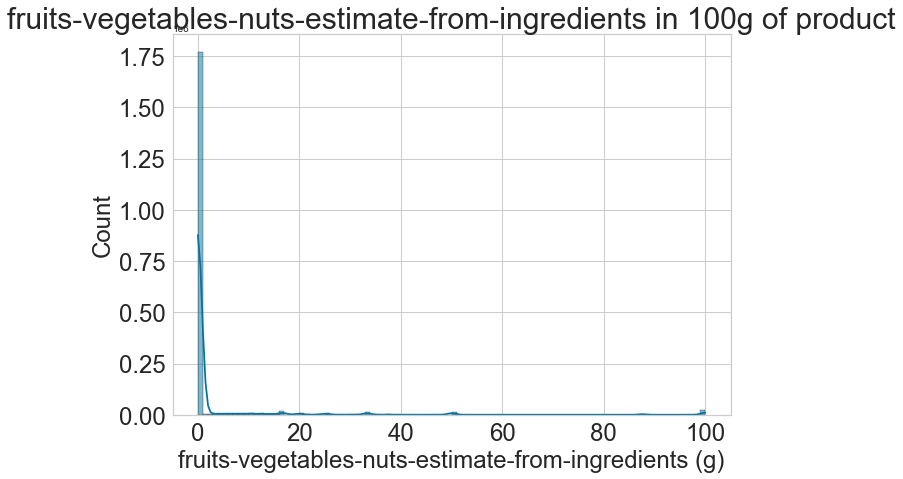

0    0.0
dtype: float64


/opt/anaconda3/lib/python3.8/site-packages/unidip/dip.py:27: RuntimeWarning: divide by zero encountered in true_divide
  slopes = (work_cdf[1:] - work_cdf[0]) / distances


(0.4459335417242577, 0.000999000999000999, (0, 7075))


In [1273]:
# Distribution des variables quantitatives

col_composition = ['energy-kcal_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g',
                   'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g',
                   'fruits-vegetables-nuts-estimate-from-ingredients_100g']

for col in col_composition:
    if col == 'energy-kcal_100g':
        plt.figure(figsize=(10, 7))
        sns.histplot(x=col, data=df, binwidth = 10,  kde = True)
        plt.xticks(fontsize = 24)
        plt.xlabel(col[0: -5], fontsize = 24)
        plt.ylabel('Count', fontsize = 24)
        plt.yticks(fontsize = 24)
        plt.title('{} in 100g of product'.format(col[0:-5]), fontsize = 30)
        plt.show()
        
        print(df[col].mode())

        print(dip.diptst(df[col])) # The second value is the dip test p-value which < 0.05 
                                    # shows that our data is not unimodal.

    else :
        plt.figure(figsize=(10, 7))
        sns.histplot(x=col, data=df, binwidth = 1,  kde = True)
        plt.xticks(fontsize = 24)
        plt.xlabel('{} (g)'.format(col[0:-5]), fontsize = 24)
        plt.ylabel('Count', fontsize = 24)
        plt.yticks(fontsize = 24)
        plt.title('{} in 100g of product'.format(col[0:-5]), fontsize = 30)        
        plt.show()
        
        print(df[col].mode())

        print(dip.diptst(df[col])) # DIP test pour vérifier la caractère de varible (uni ou multimodale)
                                    # si 2ème valeur < 0.05, il est multimodale

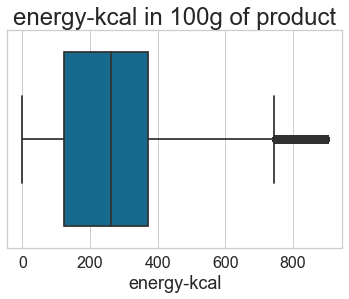

count    1.975134e+06
mean     2.655115e+02
std      1.747295e+02
min      0.000000e+00
25%      1.230000e+02
50%      2.619048e+02
75%      3.710000e+02
max      9.000000e+02
Name: energy-kcal_100g, dtype: float64


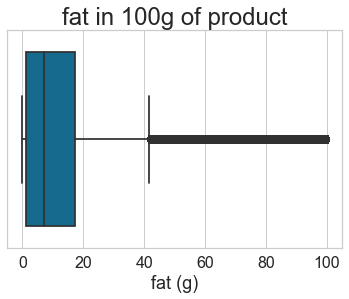

count    1.975134e+06
mean     1.234793e+01
std      1.629857e+01
min      0.000000e+00
25%      1.200000e+00
50%      7.020000e+00
75%      1.740000e+01
max      1.000000e+02
Name: fat_100g, dtype: float64


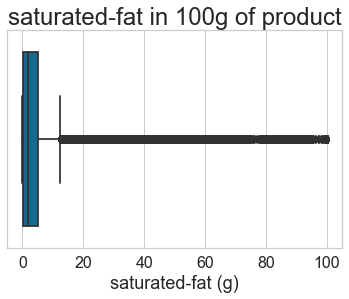

count    1.975134e+06
mean     4.330193e+00
std      7.050569e+00
min      0.000000e+00
25%      2.000000e-01
50%      1.700000e+00
75%      5.100000e+00
max      1.000000e+02
Name: saturated-fat_100g, dtype: float64


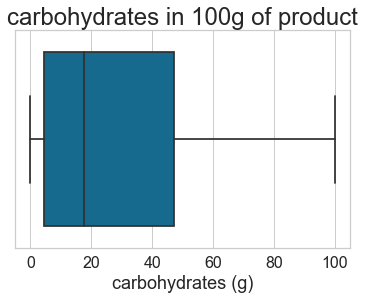

count    1.975134e+06
mean     2.599603e+01
std      2.582236e+01
min      0.000000e+00
25%      4.600000e+00
50%      1.757000e+01
75%      4.700000e+01
max      1.000000e+02
Name: carbohydrates_100g, dtype: float64


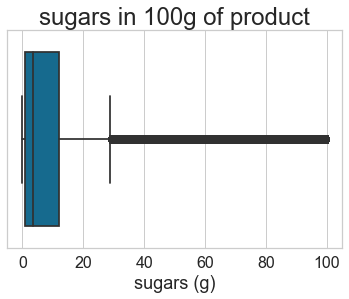

count    1.975134e+06
mean     1.135768e+01
std      1.795145e+01
min      0.000000e+00
25%      9.000000e-01
50%      3.570000e+00
75%      1.200000e+01
max      1.000000e+02
Name: sugars_100g, dtype: float64


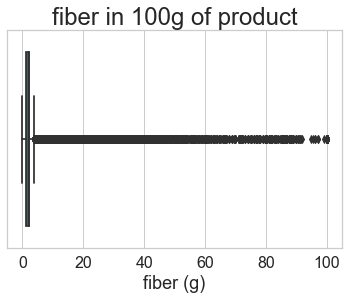

count    1.975134e+06
mean     2.172987e+00
std      2.670623e+00
min      0.000000e+00
25%      1.100000e+00
50%      2.200000e+00
75%      2.200000e+00
max      1.000000e+02
Name: fiber_100g, dtype: float64


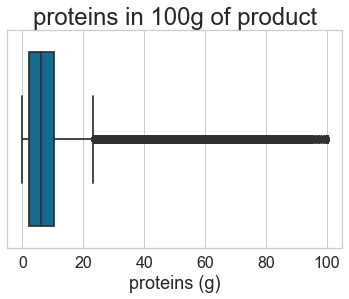

count    1.975134e+06
mean     8.139161e+00
std      9.045802e+00
min      0.000000e+00
25%      2.000000e+00
50%      6.100000e+00
75%      1.051000e+01
max      1.000000e+02
Name: proteins_100g, dtype: float64


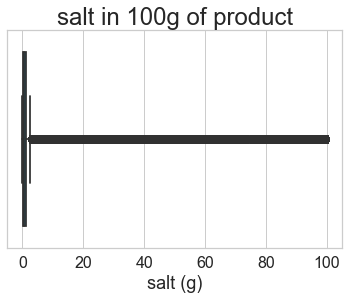

count    1.975134e+06
mean     1.147438e+00
std      4.063218e+00
min      0.000000e+00
25%      1.000000e-01
50%      5.750000e-01
75%      1.100000e+00
max      1.000000e+02
Name: salt_100g, dtype: float64


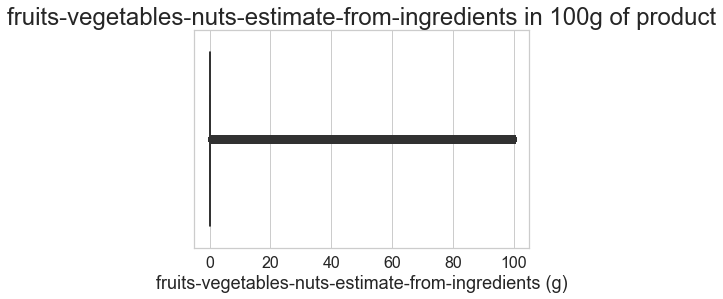

count    1.975134e+06
mean     3.592503e+00
std      1.461344e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+02
Name: fruits-vegetables-nuts-estimate-from-ingredients_100g, dtype: float64


In [1274]:
# Analyses graphiques des variables

for col in col_composition:
    if col == 'energy-kcal_100g':
        sns.boxplot(x=col, data=df)
        plt.xticks(fontsize = 16)
        plt.xlabel(col[0: -5], fontsize = 18)
        plt.title('{} in 100g of product'.format(col[0:-5]), fontsize = 24)
        plt.show()
        print(df[col].describe())
    else:
        sns.boxplot(x=col, data=df)
        plt.xticks(fontsize = 16)
        plt.xlabel('{} (g)'.format(col[0:-5]), fontsize = 18)
        plt.title('{} in 100g of product'.format(col[0:-5]), fontsize = 24)        
        plt.show()
        print(df[col].describe())

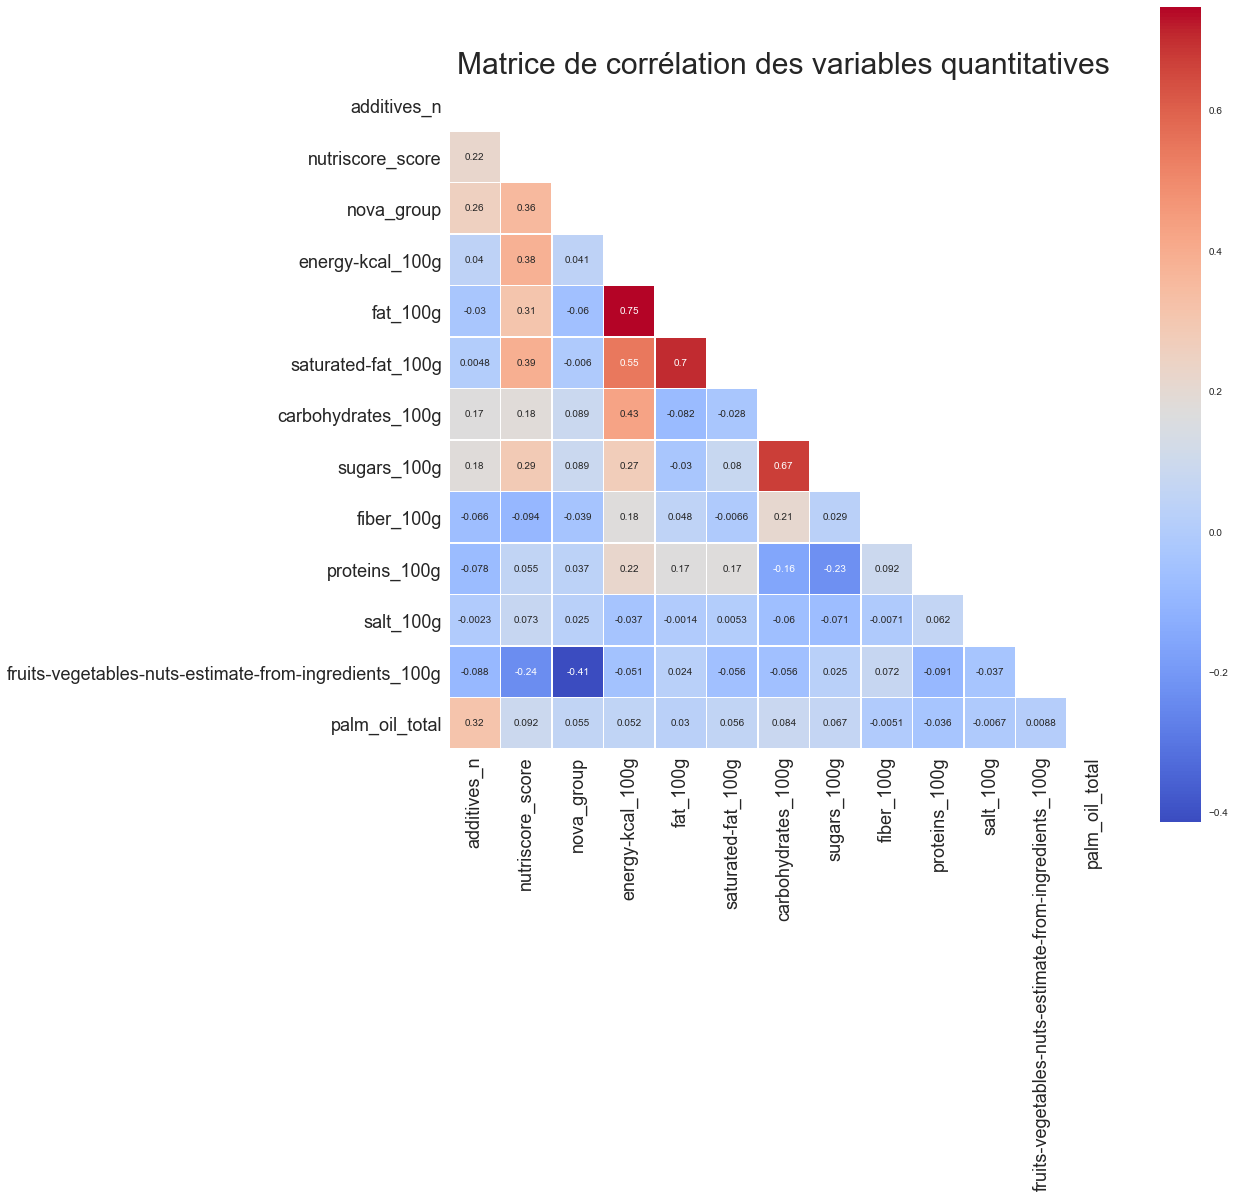

In [1275]:
# Corrélation entre les variables quantitatives

corr_matrix = df.corr()
mask = np.triu(corr_matrix)

plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix, cmap="coolwarm", mask=mask, linewidths=.5, annot=True, cbar=True, square=True)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.title("Matrice de corrélation des variables quantitatives", fontsize = 30)
plt.show()

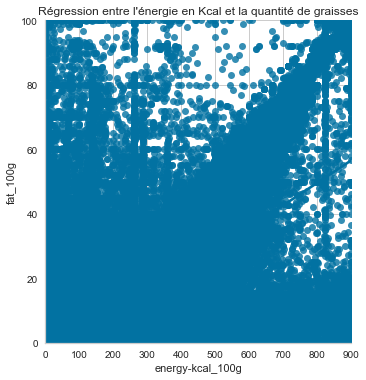

In [1276]:
# Analyse de régression entre energie en Kcal et quantité de graisses pour 100g

sns.lmplot(x="energy-kcal_100g", y="fat_100g", data=df)
plt.title("Régression entre l'énergie en Kcal et la quantité de graisses")
plt.xlim(df["energy-kcal_100g"].min(), df["energy-kcal_100g"].max())
plt.ylim(df["fat_100g"].min(), df["fat_100g"].max())
plt.show()

In [1277]:
pg.linear_regression(X=df["energy-kcal_100g"], y=df["fat_100g"], add_intercept=True, alpha=0.05)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,-6.163794,0.014015,-439.811337,0.0,0.558677,0.558677,-6.191262,-6.136326
1,energy-kcal_100g,0.069721,0.000044,1581.248256,0.0,0.558677,0.558677,0.069635,0.069807


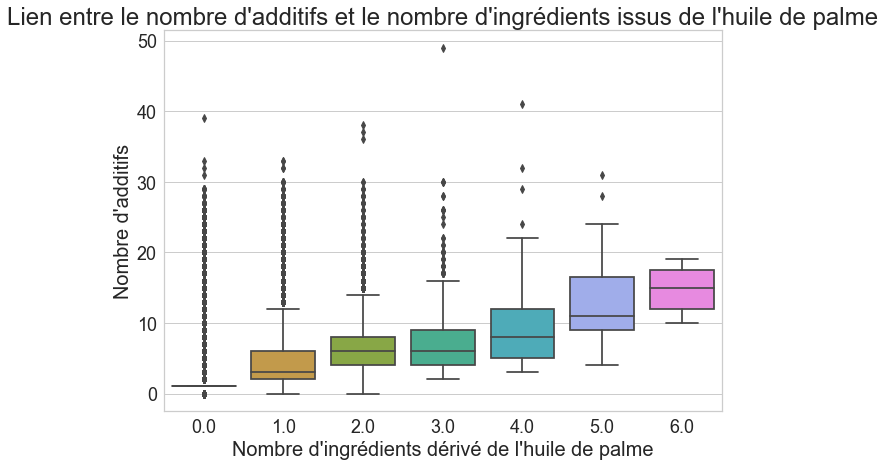

In [1278]:
# Analyses entre le nombre de d'additifs et le nombre d'ingrédients dérivé de l'huil de palme

plt.figure(figsize=(10, 7))
sns.boxplot(x="palm_oil_total", y="additives_n", data=df)
plt.xlabel("Nombre d'ingrédients dérivé de l'huile de palme", fontsize = 20)
plt.ylabel("Nombre d'additifs", fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.title("Lien entre le nombre d'additifs et le nombre d'ingrédients issus de l'huile de palme", fontsize = 24)
plt.show()

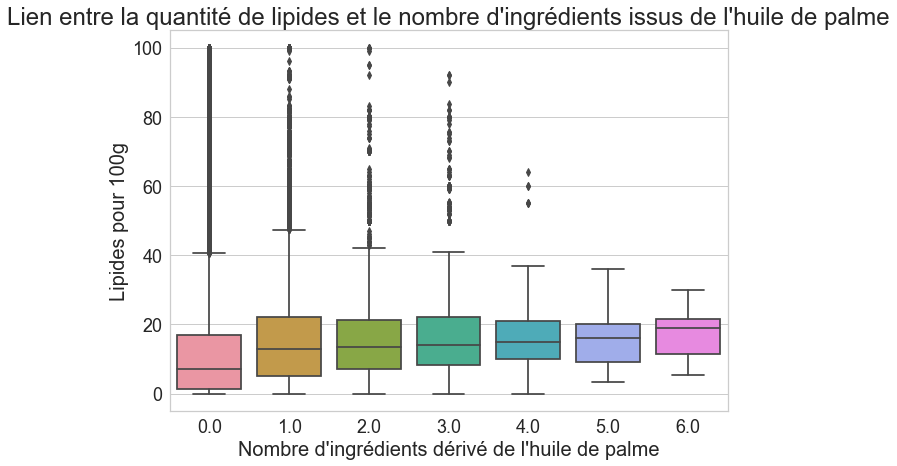

In [1279]:
# Analyses entre la quantité de graisse et le nombre d'ingrédients dérivé de l'huil de palme

plt.figure(figsize=(10, 7))
sns.boxplot(x="palm_oil_total", y="fat_100g", data=df)
plt.xlabel("Nombre d'ingrédients dérivé de l'huile de palme", fontsize = 20)
plt.ylabel("Lipides pour 100g", fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.title("Lien entre la quantité de lipides et le nombre d'ingrédients issus de l'huile de palme", fontsize = 24)
plt.show()

In [1280]:
pg.anova(data=df, dv="fat_100g", between="palm_oil_total")

,Source,ddof1,ddof2,F,p-unc,np2
0,palm_oil_total,6,1975127,330.237616,0.0,0.001002


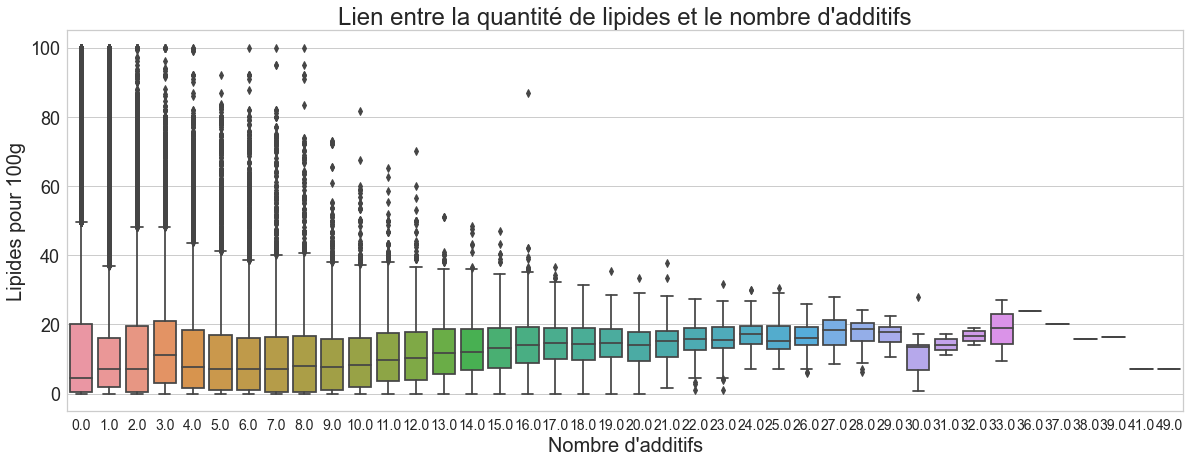

In [1281]:
# Analyses entre la quantité de graisse et le nombre de d'additifs

plt.figure(figsize=(20, 7))
sns.boxplot(x="additives_n", y="fat_100g", data=df)
plt.xlabel("Nombre d'additifs", fontsize = 20)
plt.ylabel("Lipides pour 100g", fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 18)
plt.title("Lien entre la quantité de lipides et le nombre d'additifs", fontsize = 24)
plt.show()

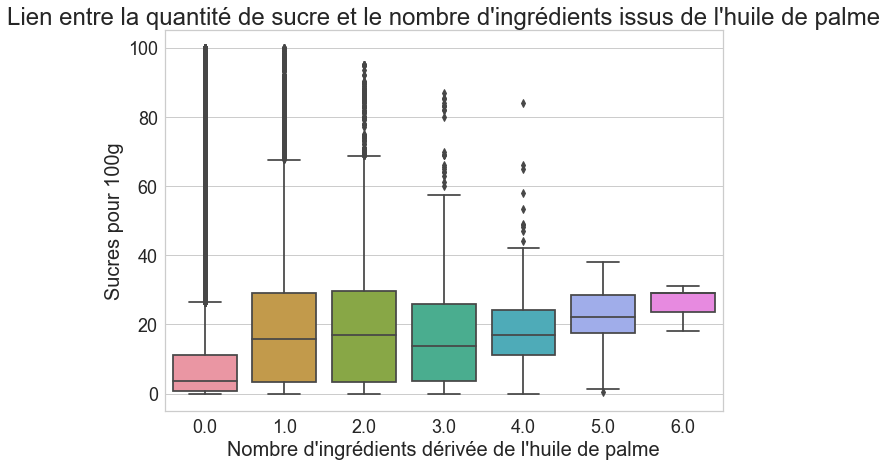

In [1282]:
# Analyses entre la quantité de sucre et le nombre d'ingrédients dérivé de l'huil de palme

plt.figure(figsize=(10, 7))
sns.boxplot(x="palm_oil_total", y="sugars_100g", data=df)
plt.title("Lien entre la quantité de sucre et le nombre d'ingrédients issus de l'huile de palme", fontsize = 24)
plt.xlabel("Nombre d'ingrédients dérivée de l'huile de palme", fontsize= 20)
plt.ylabel("Sucres pour 100g", fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.show()

In [1283]:

pg.anova(data=df, dv="sugars_100g", between="palm_oil_total")

,Source,ddof1,ddof2,F,p-unc,np2
0,palm_oil_total,6,1975127,1786.724583,0.0,0.005398


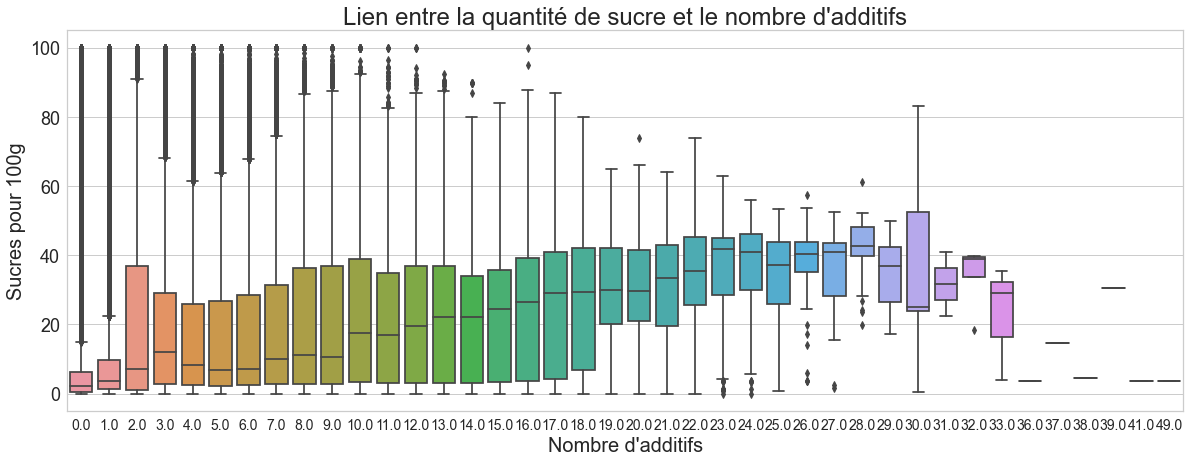

In [1284]:
# Analyses entre la quantité de sucre et le nombre de d'additifs

plt.figure(figsize=(20, 7))
sns.boxplot(x="additives_n", y="sugars_100g", data=df)
plt.title("Lien entre la quantité de sucre et le nombre d'additifs", fontsize = 24)
plt.xlabel("Nombre d'additifs", fontsize = 20)
plt.ylabel("Sucres pour 100g", fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 18)
plt.show()

In [1285]:

pg.anova(data=df, dv="sugars_100g", between="additives_n")

,Source,ddof1,ddof2,F,p-unc,np2
0,additives_n,39,1975094,2538.98786,0.0,0.047741


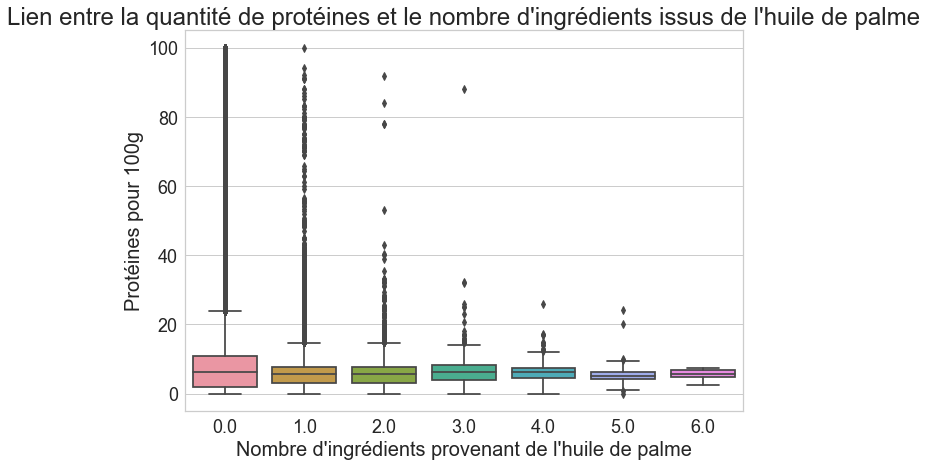

In [1286]:
# Analyses entre la quantité de protéines et le nombre d'ingrédients dérivé de l'huil de palme

plt.figure(figsize=(10, 7))
sns.boxplot(x="palm_oil_total", y="proteins_100g", data=df)
plt.xlabel("Nombre d'ingrédients provenant de l'huile de palme", fontsize = 20)
plt.ylabel("Protéines pour 100g", fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.title("Lien entre la quantité de protéines et le nombre d'ingrédients issus de l'huile de palme", fontsize = 24)
plt.show()

In [1287]:
pg.anova(data=df, dv="proteins_100g", between="palm_oil_total")

,Source,ddof1,ddof2,F,p-unc,np2
0,palm_oil_total,6,1975127,514.622491,0.0,0.001561


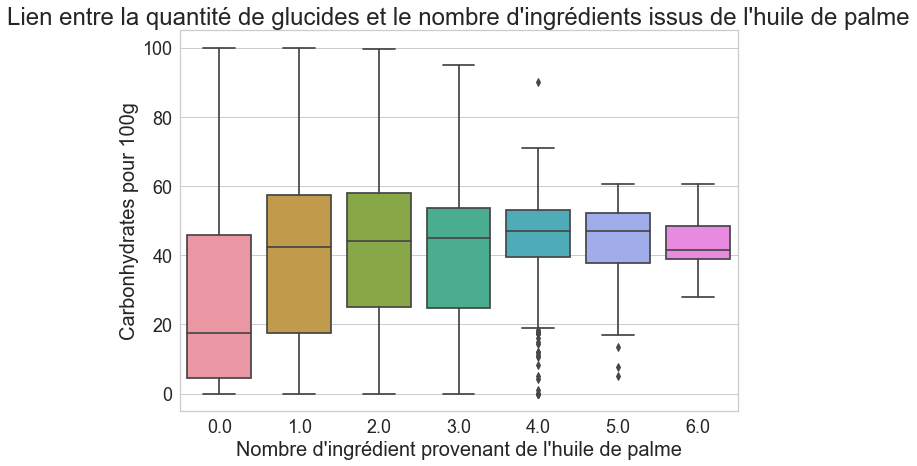

In [1288]:
# Analyses entre la quantité de carbohydrates et le nombre d'ingrédients dérivé de l'huil de palme

plt.figure(figsize=(10, 7))
sns.boxplot(x="palm_oil_total", y="carbohydrates_100g", data=df)
plt.title("Lien entre la quantité de glucides et le nombre d'ingrédients issus de l'huile de palme", fontsize = 24)
plt.xlabel("Nombre d'ingrédient provenant de l'huile de palme", fontsize = 20)
plt.ylabel("Carbonhydrates pour 100g", fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.show()

In [1289]:
pg.anova(data=df, dv="carbohydrates_100g", between="palm_oil_total")

,Source,ddof1,ddof2,F,p-unc,np2
0,palm_oil_total,6,1975127,2641.571414,0.0,0.007961


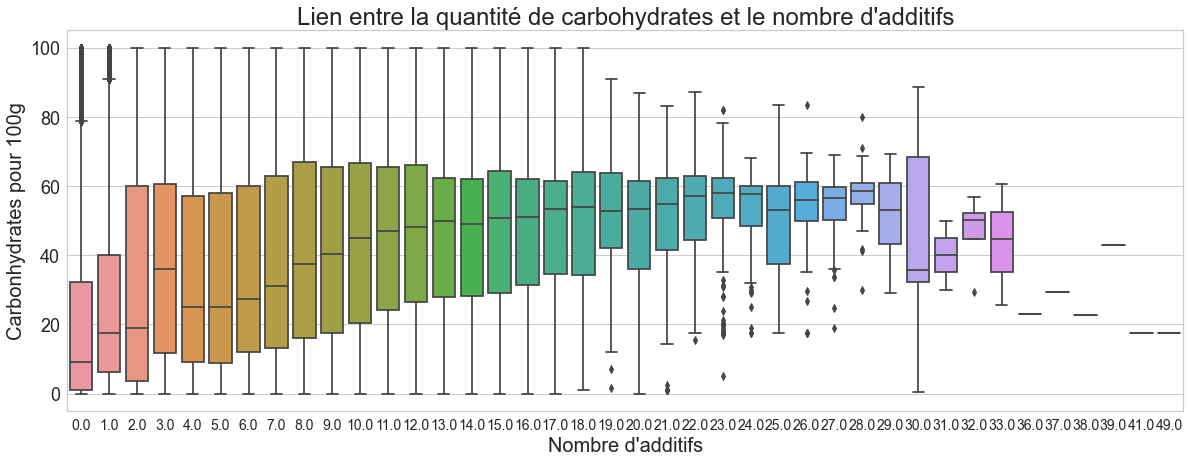

In [1290]:
# Analyses entre la quantité de carbohydrates et le nombre de d'additifs
plt.figure(figsize=(20, 7))
sns.boxplot(x="additives_n", y="carbohydrates_100g", data=df)
plt.title("Lien entre la quantité de carbohydrates et le nombre d'additifs", fontsize = 24)
plt.xlabel("Nombre d'additifs", fontsize = 20)
plt.ylabel("Carbonhydrates pour 100g", fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 18)
plt.show()


In [1291]:
pg.anova(data=df, dv="carbohydrates_100g", between="additives_n")

,Source,ddof1,ddof2,F,p-unc,np2
0,additives_n,39,1975094,1907.428253,0.0,0.036297


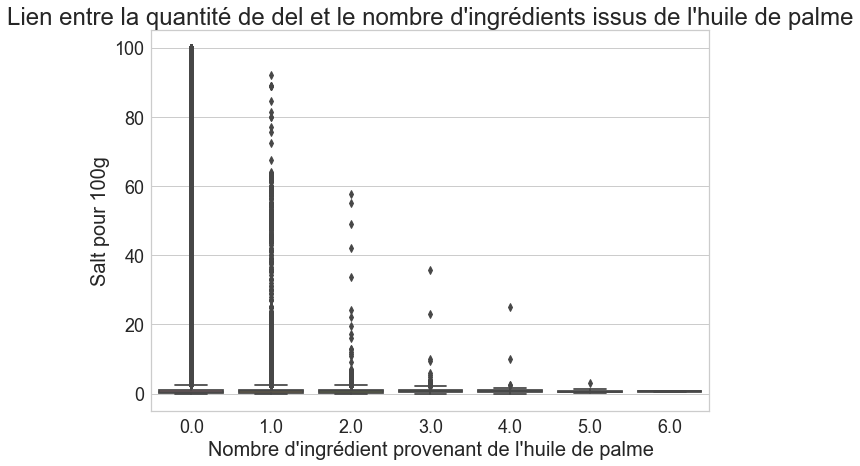

In [1292]:
# Analyses entre la quantité de sel et le nombre d'ingrédients dérivé de l'huil de palme

plt.figure(figsize=(10, 7))
sns.boxplot(x="palm_oil_total", y="salt_100g", data=df)
plt.title("Lien entre la quantité de del et le nombre d'ingrédients issus de l'huile de palme", fontsize = 24)
plt.xlabel("Nombre d'ingrédient provenant de l'huile de palme",fontsize = 20)
plt.ylabel("Salt pour 100g", fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.show()

In [1293]:
pg.anova(data=df, dv="salt_100g", between="palm_oil_total")

,Source,ddof1,ddof2,F,p-unc,np2
0,palm_oil_total,6,1975127,16.361757,6.047687e-19,0.00005


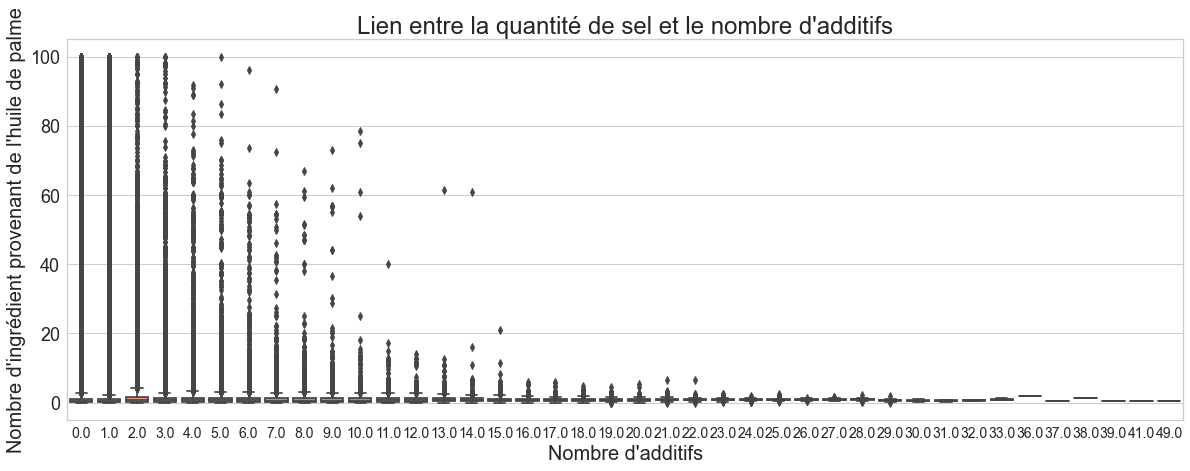

In [1294]:
# Analyses entre la quantité de sel et le nombre de d'additifs

plt.figure(figsize=(20, 7))
sns.boxplot(x="additives_n", y="salt_100g", data=df)
plt.title("Lien entre la quantité de sel et le nombre d'additifs", fontsize = 24)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 18)
plt.ylabel("Nombre d'ingrédient provenant de l'huile de palme",fontsize = 20)
plt.xlabel("Nombre d'additifs", fontsize = 20)
plt.show()

In [1295]:
pg.anova(data=df, dv="salt_100g", between="additives_n")

,Source,ddof1,ddof2,F,p-unc,np2
0,additives_n,39,1975094,17.710345,3.784036e-120,0.00035


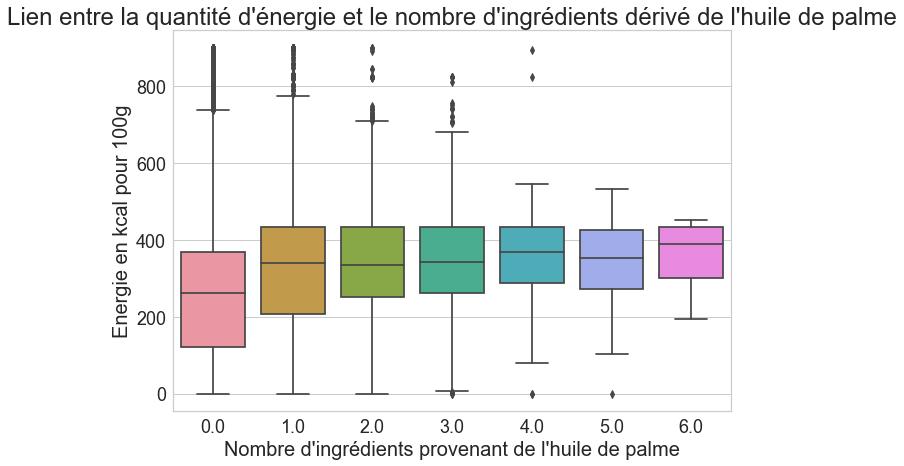

In [1296]:
# Analyses entre la quantité d'énergie et le nombre d'ingrédients dérivé de l'huile de palme

plt.figure(figsize=(10, 7))
sns.boxplot(x="palm_oil_total", y="energy-kcal_100g", data=df)
plt.title("Lien entre la quantité d'énergie et le nombre d'ingrédients dérivé de l'huile de palme", fontsize = 24)
plt.xlabel("Nombre d'ingrédients provenant de l'huile de palme", fontsize = 20)
plt.ylabel("Energie en kcal pour 100g", fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.show()

In [1297]:
pg.anova(data=df, dv="energy-kcal_100g", between="palm_oil_total")

,Source,ddof1,ddof2,F,p-unc,np2
0,palm_oil_total,6,1975127,969.865872,0.0,0.002938


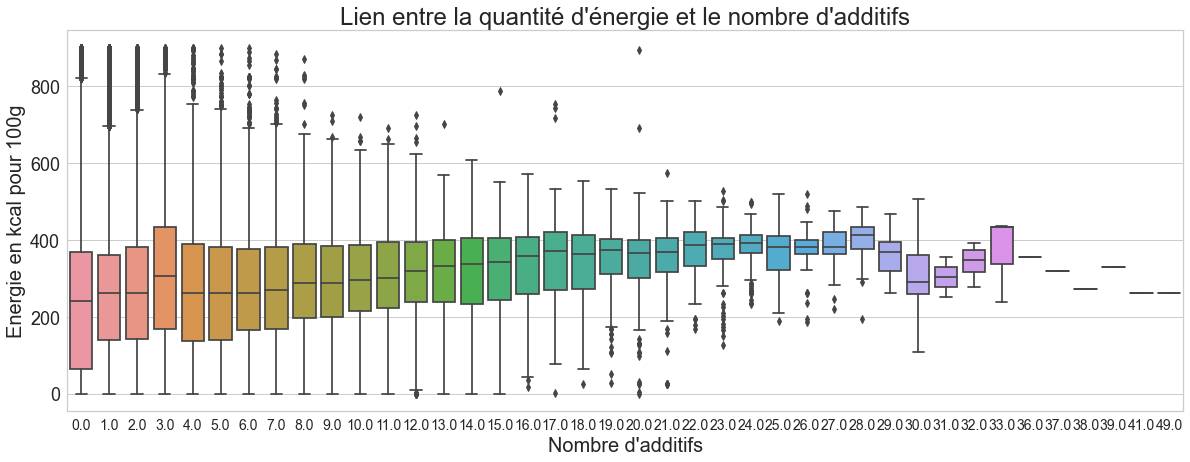

In [1298]:
# Analyses entre la quantité d'énergie et le nombre d'additifs

plt.figure(figsize=(20, 7))
sns.boxplot(x="additives_n", y="energy-kcal_100g", data=df)
plt.title("Lien entre la quantité d'énergie et le nombre d'additifs", fontsize = 24)
plt.xlabel("Nombre d'additifs", fontsize = 20)
plt.ylabel("Energie en kcal pour 100g", fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 18)
plt.show()

In [1299]:
pg.anova(data=df, dv="energy-kcal_100g", between="additives_n")

,Source,ddof1,ddof2,F,p-unc,np2
0,additives_n,39,1975094,162.974089,0.0,0.003208


In [245]:
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(7,6))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)
        
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(7,6))
        
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)

In [246]:
# combiner 2 variables (additives_n et palm_oil_total) en nouvelles variables

n_comp = 2
scaler = StandardScaler()
pca = PCA(n_components=n_comp)

data = df[['additives_n', 'palm_oil_total']]

X = data.values
features = data.columns
X_scaled = scaler.fit_transform(X)
pca_components = pca.fit_transform(X_scaled)
pcs = pca.components_

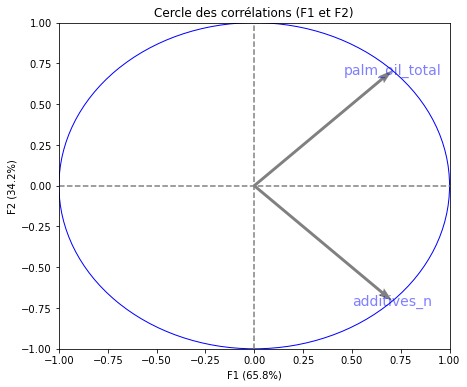

In [247]:
# Afficher le cercle des corrélations

display_circles(pcs, n_comp, pca, [(0, 1)], labels = np.array(features))

In [248]:
# Coefficients correspondant aux deux variables (additives_n, palm_oil_total)

for i in range(n_comp):
    F = pca.components_[i]
    print(F)

[0.70710678 0.70710678]
[-0.70710678  0.70710678]


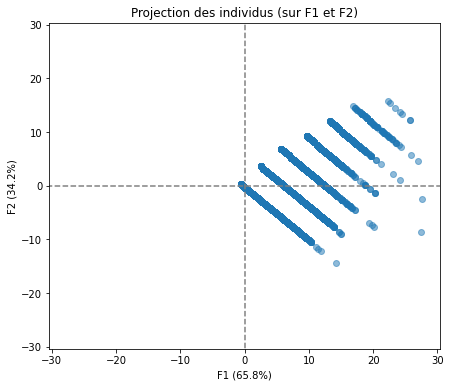

In [249]:
# afficher les produits sur le plan factoriel (F1 et F2)

X_projected = pca.fit_transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3)], alpha = 0.5)
plt.show()

In [250]:
# Ajouter la nouvelle variable combinant les 2 variables additives_n, palm_oil_total

additive_palm_projected = pd.DataFrame(X_projected, index = data.index, columns = ['F'+str(i+1) for i in range(n_comp)])
df['additive_palm'] = additive_palm_projected.iloc[:, 0]

In [251]:
def knn_search(x, D, K):
    
 # find K nearest neighbours of data among D

 ndata = D.shape[0]
 K = K if K < ndata else ndata

 # euclidean distances from the other points
    
 sqd = np.sqrt(((D - x)**2).sum(axis=1))
 idx = np.argsort(sqd) # sorting
    
 # return the indexes of K nearest neighbours

 return idx[:K], sqd[idx[:K]]

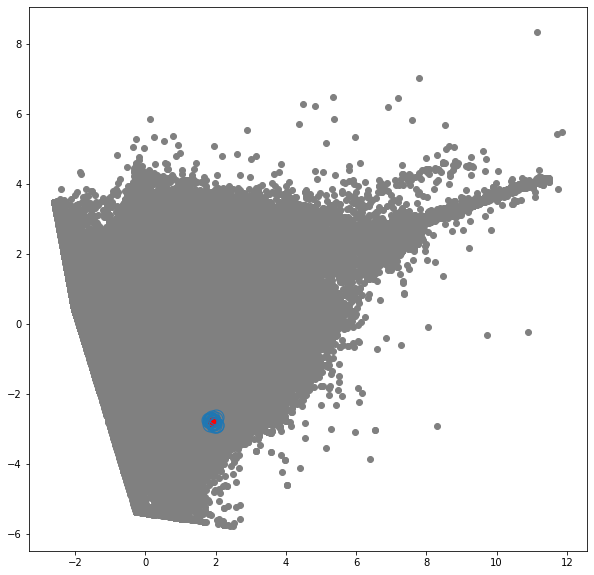

In [351]:
n = 389  # index de produit référent (le produit est scanné)

# choisir seulement le produit scanné 
# et les autres produits contenant moins d'addtifs et d'ingrédient dérivé de l'huile de palme

add_palm = df.iloc[n, -1]
df_2 = df[df['additive_palm'] < add_palm]
product = pd.DataFrame(df.iloc[n: n+1])
df_2 = pd.concat([product, df_2])
df_2.reset_index(drop= True, inplace = True)

# les indicateurs utilisés pour chercher les produits similaires

data = df_2[['energy-kcal_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g','sugars_100g',
           'proteins_100g', 'salt_100g']]


X = data.values
X_scaled = scaler.fit_transform(X)
n_comp = 2
pca = PCA(n_components=n_comp)
pca_components = pca.fit_transform(X_scaled)
pcs = pca.components_
X_projected = pca.fit_transform(X_scaled)

# knn_search test

x = X_scaled[0].reshape(1, -1) # produit scanné

# performing the search
neig_idx, neig_distance = knn_search(x,X_scaled,40)

# plotting touts les produits sur 1er plan factoriel (gris)

plt.figure(figsize=(10,10))
plt.scatter(X_projected[:,0],X_projected[:,1], c = 'grey')


# highlighting 40 produits plus similaires (rouge)

plt.plot(X_projected[neig_idx, 0],X_projected[neig_idx, 1],'o',markerfacecolor='None',markersize=15,markeredgewidth=1)

# plotting the produit scanné (bleu)
plt.scatter(X_projected[0,0],X_projected[0,1],c ='red', s = 100)
plt.show()

In [332]:
# choisir les produits similaires

neigh_product = df_2.iloc[neig_idx, :]
neigh_product['score_similarite'] = 1 - neig_distance/X_scaled.shape[1]

# les produits similaire cherchés dans un même pays (et un même magasin s'il est possible)
# Pour qu'ils sont dans un même pays

country = df.iloc[n,5]
neigh_product_country = neigh_product[neigh_product['countries'] == df.iloc[n,5]]
if neigh_product_country.shape[0] > 3:
    pass
else: neigh_product_country = neigh_product
neigh_product_country.sort_values('additive_palm', ascending = True)

# Pour qu' ils sont dans un même magasin

brand = df.iloc[n, 4]
if pd.isna(df.iloc[n, 4]):
    similar_product = neigh_product_country.sort_values('additive_palm', ascending = True)
else:
    similar_product_1 = neigh_product_country[neigh_product['brands'] == brand].sort_values('additive_palm', ascending = True)
    similar_product_2 = neigh_product_country[neigh_product['brands'] != brand].sort_values('additive_palm', ascending = True)
    similar_product =pd.concat([similar_product_1, similar_product_2], axis = 0)
similar_product = similar_product[similar_product['additive_palm'] < df.iloc[n, -1]]

# le produit connu et les propositions

product = pd.DataFrame(df.iloc[n: n+1])
result = pd.concat([product, similar_product], axis = 0)
result.drop_duplicates(keep='first', inplace=True)
index = ['product', '1ere propositon', '2eme proposition', '3eme proposition', '4eme proposition', '5eme proposition']
if result.shape[0] > 6:
    result = result.iloc[0:6]
    result.index = index
else:
    result.index = index[:result.shape[0]]
result[['product_name', 'brands', 'countries','energy-kcal_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g','sugars_100g',
           'proteins_100g', 'salt_100g', 'additives_n', 'palm_oil_total', 'additive_palm', 'score_similarite']]

<ipython-input-332-20837d0b822c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neigh_product['score_similarite'] = 1 - neig_distance/X_scaled.shape[1]
<ipython-input-332-20837d0b822c>:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  similar_product_1 = neigh_product_country[neigh_product['brands'] == brand].sort_values('additive_palm', ascending = True)
<ipython-input-332-20837d0b822c>:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  similar_product_2 = neigh_product_country[neigh_product['brands'] != brand].sort_values('additive_palm', ascending = True)


,product_name,brands,countries,energy-kcal_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,additives_n,palm_oil_total,additive_palm,score_similarite
product,Coeurs chocolat tte couleur,Agora,France,470.0,15.00,9.70,76.0,54.00,4.10,0.0100,10.0,0.0,3.158712,NaN
1ere propositon,Ptit rond chocolat multicolore,Agora,France,470.0,15.00,9.70,76.0,54.00,4.10,0.0100,7.0,0.0,2.022660,1.000000
2eme proposition,Cœurs de chocolat,NaN,France,470.0,15.00,9.70,76.0,54.00,4.10,0.0100,1.0,0.0,-0.249443,1.000000
3eme proposition,Chai tougan mango te,David rio,France,464.0,14.29,10.71,75.0,57.14,3.57,0.2225,1.0,0.0,-0.249443,0.964451
4eme proposition,Mini coeurs ivoire,NaN,France,479.0,15.00,8.10,75.0,54.00,6.10,0.0100,1.0,0.0,-0.249443,0.954120
5eme proposition,Cadbury double decker,NaN,France,459.0,17.00,8.90,72.0,55.00,3.80,0.2000,1.0,0.0,-0.249443,0.964412


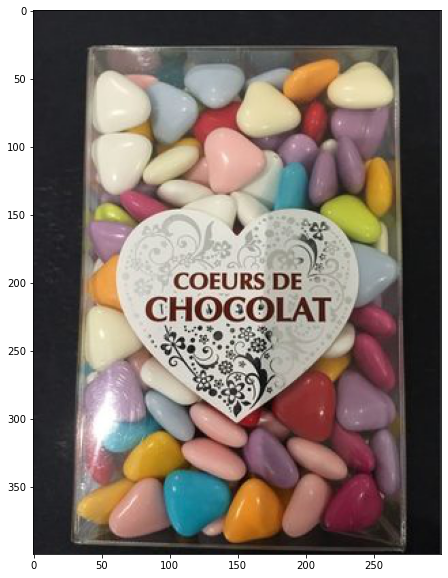

In [333]:
# image du produit connu

from PIL import Image
import requests

im = Image.open(requests.get(result.iloc[0,13], stream=True).raw)
plt.figure(figsize=(10,10))
plt.imshow(im)

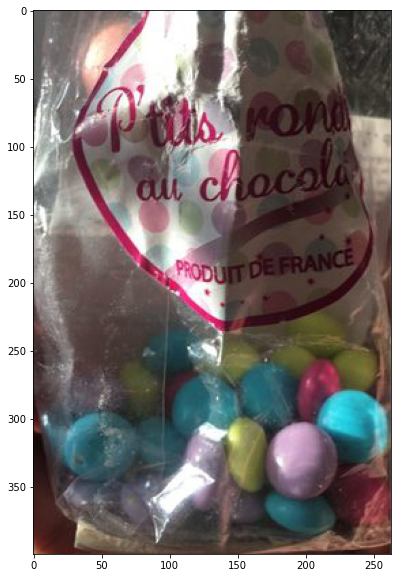

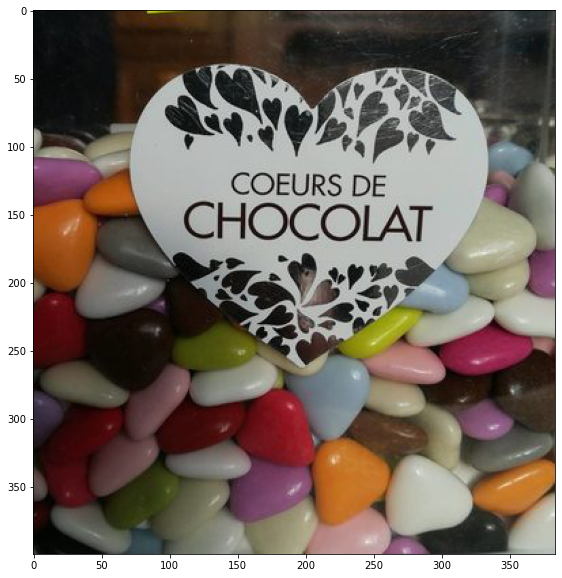

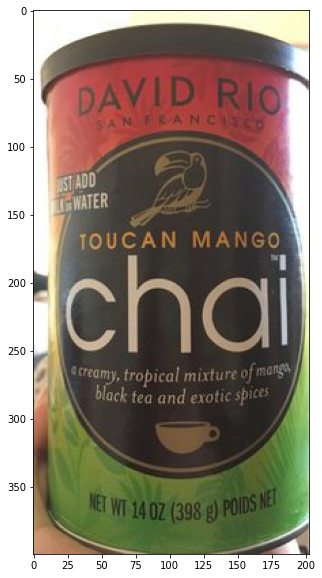

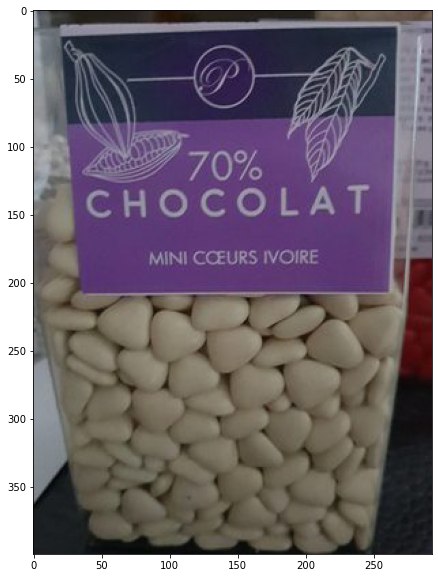

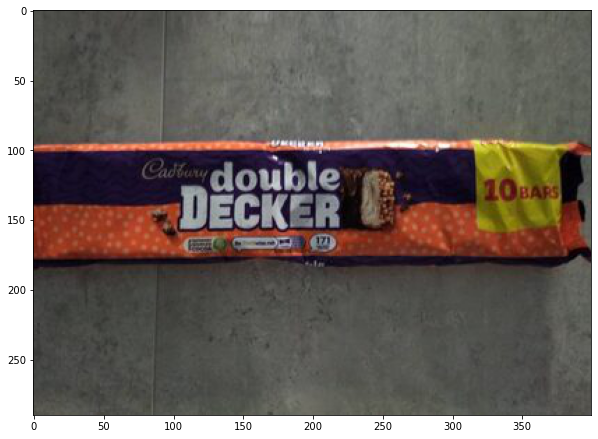

In [334]:
for i in range(1,result.shape[0]):
    if pd.notna(result.iloc[i,13]):
        im = Image.open(requests.get(result.iloc[i,13], stream=True).raw)
        plt.figure(figsize=(10,10))
        plt.imshow(im)